<a href="https://colab.research.google.com/github/divyasrimandadi/MachineLearning/blob/main/house_price_prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
import numpy as np #numerical python to deal with maths
import pandas as pd #to read dataset,
import matplotlib.pyplot as plt# visualizations
import seaborn as sns #advance visualization
from sklearn.model_selection import train_test_split #model_selection is module,train_test_split is function
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from seaborn import histplot as histplot
from seaborn import countplot as countplot
from seaborn import scatterplot as scatterplot

In [182]:
df=pd.read_csv("/Housing.csv")

In [183]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [184]:
df.shape

(545, 13)

In [185]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [186]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [187]:
df["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [188]:
df["bathrooms"].unique()

array([2, 4, 1, 3])

In [189]:
df["bathrooms"].unique().sum()

10

In [190]:
 df["price"].unique().sum()

1150235940

In [191]:
#replace infinite with nan values
df.replace([np.inf,-np.inf],np.nan,inplace=True)

In [192]:
#drop rows with nan values
#inplace=True means whatever changes made thar are made in dataset with df also(not in excel file)
df.dropna(subset=['price'],inplace=True)

In [193]:
sns.set_style("whitegrid")

Scatterplot of price vs area

TypeError: 'str' object is not callable

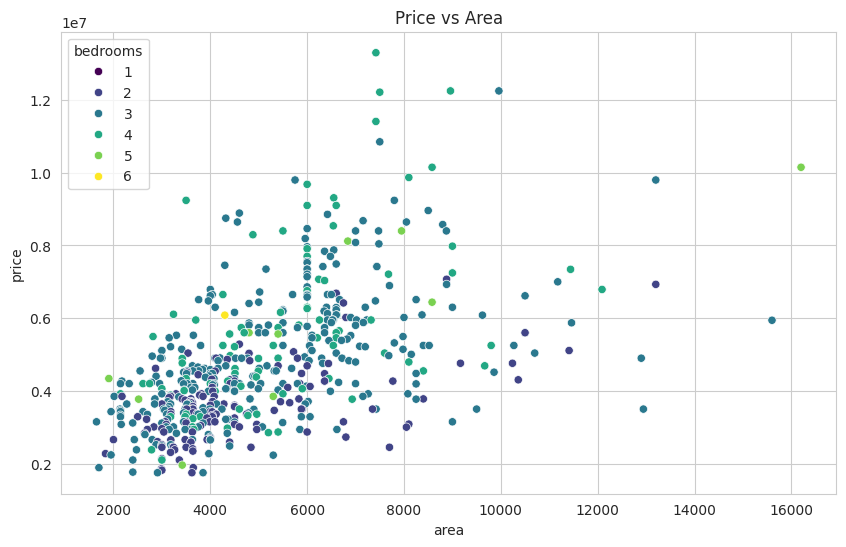

In [195]:
plt.figure(figsize=(10,6))
#Scatterplot of prive vs area(to know how they are co related.)
sns.scatterplot(x='area',y='price',data=df,hue='bedrooms',palette='viridis')
plt.title("Price vs Area")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.legend(title="Bedrooms")
plt.show


count plot of bedrooms

TypeError: 'str' object is not callable

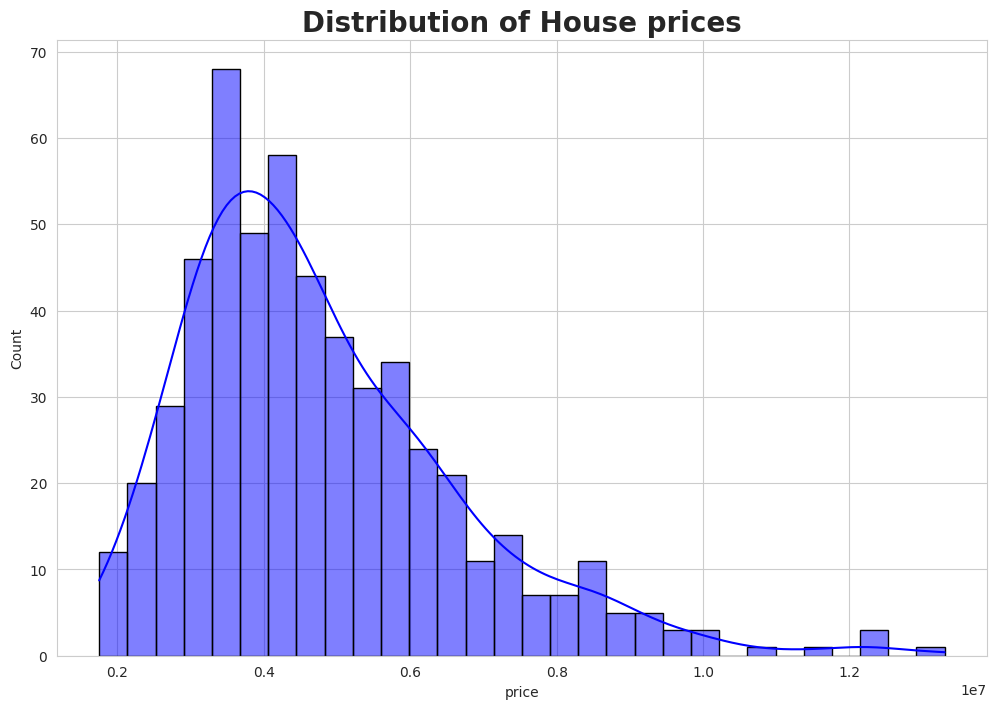

In [196]:
#to know distribution of the data
plt.figure(figsize=(12,8))
sns.histplot(df['price'],bins=30,kde=True,color='blue',edgecolor='black')
plt.title('Distribution of House prices',fontsize=20,weight='bold')
plt.xlabel("Price")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#grid style
plt.grid(True,linestyle='--',alpha=0.7)
plt.show()

<ipython-input-197-2e52ca0acd5f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms',data=df,palette="viridis")


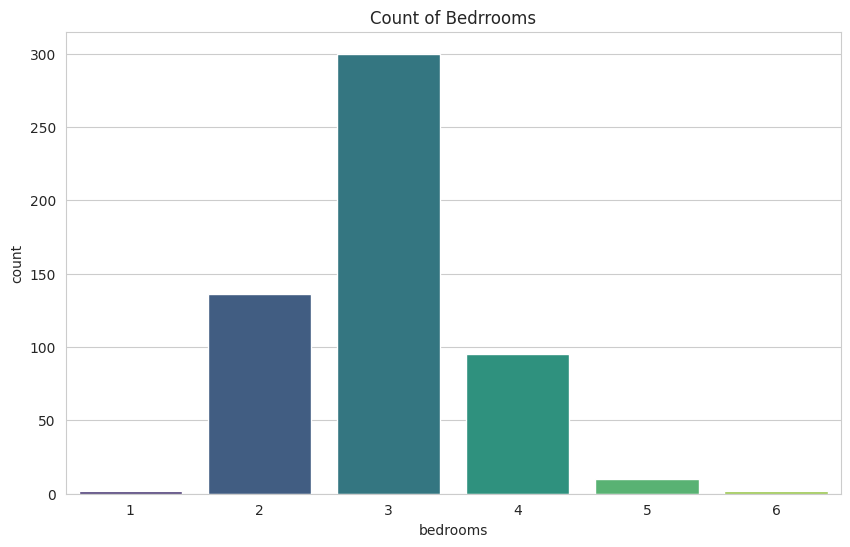

In [197]:
#count plot of bedrooms
plt.figure(figsize=(10,6))
sns.countplot(x='bedrooms',data=df,palette="viridis")
plt.xlabel="Bedrooms"
plt.ylabel="Count"
plt.title("Count of Bedrrooms")
plt.show()


In [198]:
#selecting relevent columns
df=df[['price','area','bedrooms','bathrooms']]

In [199]:
#considering x as independent variables
X=df[['area','bedrooms','bathrooms']]
y=df['price']

In [201]:
X.shape

(545, 3)

In [202]:
#splitting dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [203]:
#using linear regression
model=LinearRegression()

In [204]:
#training model
model.fit(X_train,y_train)

LinearRegression()

In [206]:
y_pred=model.predict(X_test)
y_pred

array([6383168.05981192, 6230250.35140428, 3597885.28090091,
       4289730.8386382 , 3930445.60575177, 4883933.33918115,
       5505773.16533075, 6068793.48103629, 3321512.02483442,
       3495157.72744705, 8731338.12527607, 3561265.8244721 ,
       3487335.97847431, 3633344.35548029, 3933900.2714526 ,
       6661080.95290716, 2893133.47793136, 4635197.40872131,
       4583377.42320885, 4274999.75826381, 4296640.17003986,
       4920207.32903988, 3462807.85199841, 3875170.95453847,
       5412497.19140831, 7425564.68389184, 3269692.03932195,
       5021117.35611339, 7122556.71331971, 3238600.04801447,
       5366583.9261965 , 3640253.68688195, 6057517.06636272,
       4847659.34932243, 4572198.51082701, 5573863.86824637,
       4167435.67282878, 4021179.33154444, 3764621.65211187,
       5307730.62714319, 5319221.21748587, 3456243.98716683,
       6202613.02579763, 4013357.58257171, 4534099.68582614,
       4235271.10270425, 6057517.06636272, 4525560.52386579,
       4983206.22693419,

In [207]:
#evaluating the model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error: ",mse)
print("R Squared Error: ",r2)

Mean Squared Error:  2750040479309.0522
R Squared Error:  0.4559299118872445


TypeError: 'str' object is not callable

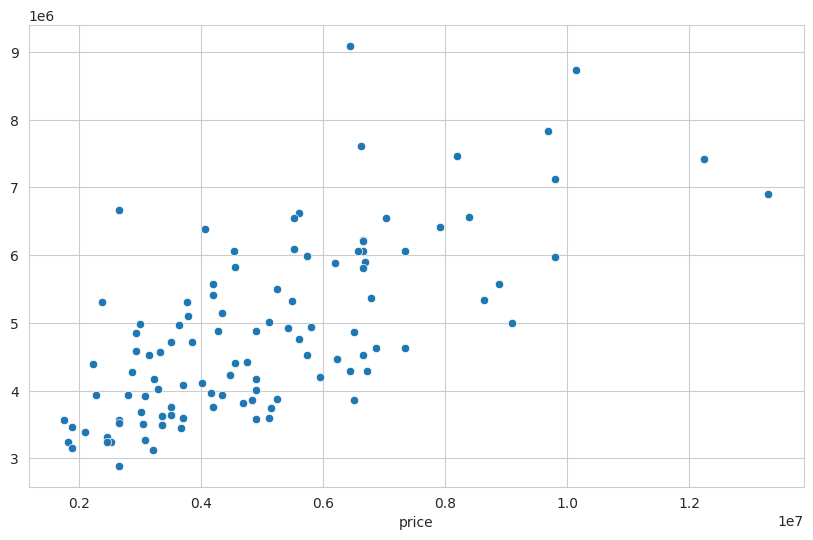

In [211]:
#visualizing the result
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price vs Predicted price")
plt.show()

In [213]:
unseen_data=pd.DataFrame({'area':[1500],'bedrooms':[3],'bathrooms':[3]})
predicted_price=model.predict(unseen_data)
print(f"Predicted price: {predicted_price}")

Predicted price: [5925237.15863014]
